In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

df_train = pd.read_csv("/home/chandraatul1022/Capstone_project_2025/Customer_Segmentation_Train.csv")
df_test = pd.read_csv("/home/chandraatul1022/Capstone_project_2025/Test_Customer_Segmentation_.csv")

df=df_train.copy()
df.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [22]:
print("\n Missing Data Analysis - Training data")
print("-" * 25)
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df_train)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)

print(missing_summary)


 Missing Data Analysis - Training data
-------------------------
                 Missing Count  Missing Percentage
Work_Experience            829           10.275161
Family_Size                335            4.152206
Ever_Married               140            1.735250
Profession                 124            1.536936
Graduated                   78            0.966782
Var_1                       76            0.941993
ID                           0            0.000000
Gender                       0            0.000000
Age                          0            0.000000
Spending_Score               0            0.000000
Segmentation                 0            0.000000


In [23]:
# Handle missing values
from sklearn.impute import SimpleImputer

num_cols = ['Work_Experience', 'Family_Size']
cat_cols = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']

num_imputer = SimpleImputer(missing_values = np.nan,strategy = 'mean')
cat_imputer = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])

df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print("Missing Data Analysis - Training data\n\n", df.isnull().sum())

Missing Data Analysis - Training data

 ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


Segment D: Count: 2268, Percentage: 28.11%
Segment A: Count: 1972, Percentage: 24.44%
Segment C: Count: 1970, Percentage: 24.42%
Segment B: Count: 1858, Percentage: 23.03%


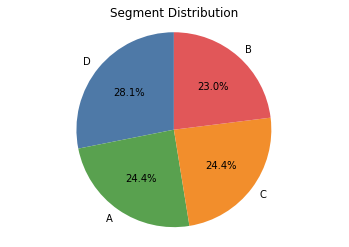

In [24]:
segmentation = df["Segmentation"].value_counts()

for segment, count in segmentation.items():
   percentage = (count / df.shape[0]) * 100
   print(f"Segment {segment}: Count: {count}, Percentage: {percentage:.2f}%")


#ploting graph
fig, ax = plt.subplots()
ax.pie(
    segmentation,
    labels=segmentation.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4e79a7', '#59a14f', '#f28e2c', '#e15759']  # New color palette
)

ax.axis('equal')

plt.title('Segment Distribution')
plt.show()   

In [ ]:
#Observations on the Target Variable
#There is no significant difference between the segments — only Segment D has about 4% more instances than the others.

In [ ]:
# Next step 
#   - Feature selection - Feature coorelation with Segmentation


In [25]:
# data cleaning

def data_cleaning(df):
 df = df.drop(['ID'], axis=1)

 df['Work_Experience'] = df['Work_Experience'].fillna(0)
 df['Ever_Married'] = df['Ever_Married'].fillna("No")
 df['Graduated'] = df['Graduated'].fillna("No")

 df.drop_duplicates(inplace=True)
 df.dropna(inplace=True)

 df['Var_1'] = df['Var_1'].str.replace('Cat_', '').astype(int)

 df['Work_Experience'] = df['Work_Experience'].astype(int)
 df['Family_Size'] = df['Family_Size'].astype(int)
 return df

df = data_cleaning(df)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7634 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           7634 non-null   object
 1   Ever_Married     7634 non-null   object
 2   Age              7634 non-null   int64 
 3   Graduated        7634 non-null   object
 4   Profession       7634 non-null   object
 5   Work_Experience  7634 non-null   int64 
 6   Spending_Score   7634 non-null   object
 7   Family_Size      7634 non-null   int64 
 8   Var_1            7634 non-null   int64 
 9   Segmentation     7634 non-null   object
dtypes: int64(4), object(6)
memory usage: 656.0+ KB


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1,Low,4,4,D
1,Female,Yes,38,Yes,Engineer,2,Average,3,4,A
2,Female,Yes,67,Yes,Engineer,1,Low,1,6,B
3,Male,Yes,67,Yes,Lawyer,0,High,2,6,B
4,Female,Yes,40,Yes,Entertainment,2,High,6,6,A


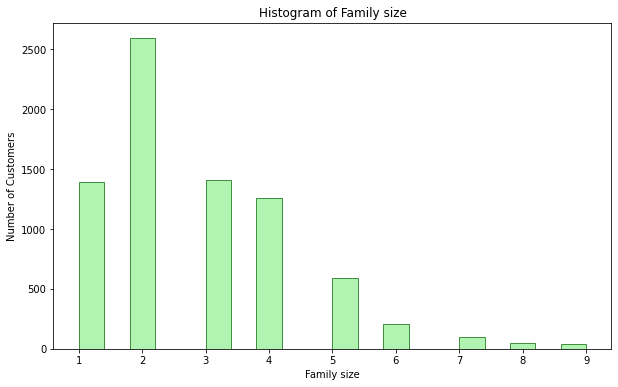

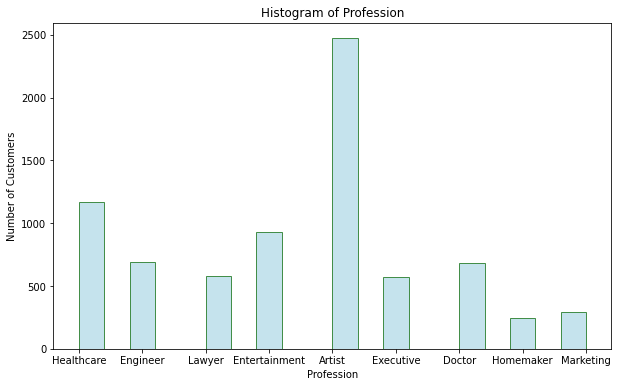

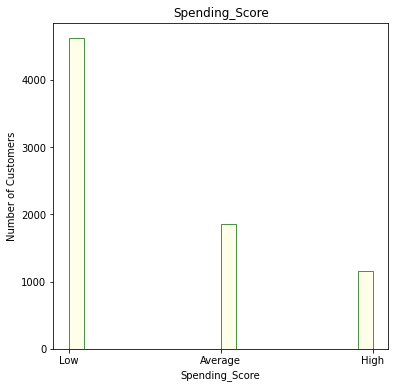

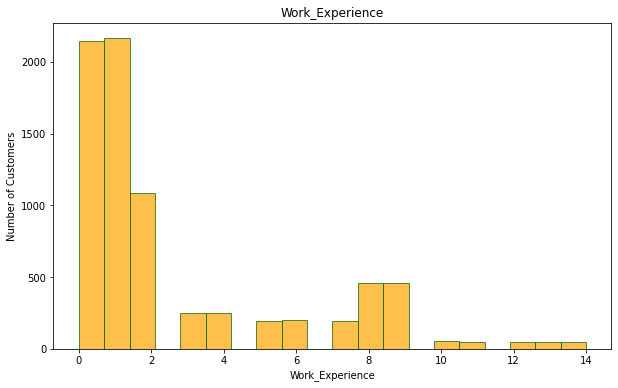

In [27]:
# Graphs

plt.figure(figsize=(10, 6))
plt.hist(df["Family_Size"], bins=20, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
plt.xlabel("Family size")
plt.ylabel("Number of Customers")
plt.title("Histogram of Family size")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df["Profession"], bins=20, color='lightblue', edgecolor='darkgreen', alpha=0.7)
plt.xlabel("Profession")
plt.ylabel("Number of Customers")
plt.title("Histogram of Profession")
plt.show()

plt.figure(figsize=(6, 6))
plt.hist(df["Spending_Score"], bins=20, color='lightyellow', edgecolor='darkgreen', alpha=0.7)
plt.xlabel("Spending_Score")
plt.ylabel("Number of Customers")
plt.title("Spending_Score")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df["Work_Experience"], bins=20, color='orange', edgecolor='darkgreen', alpha=0.7)
plt.xlabel("Work_Experience")
plt.ylabel("Number of Customers")
plt.title("Work_Experience")
plt.show()


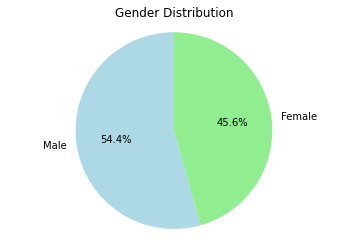

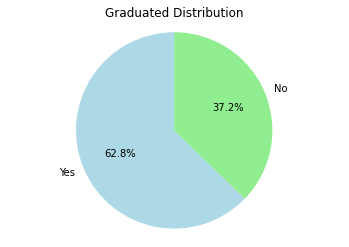

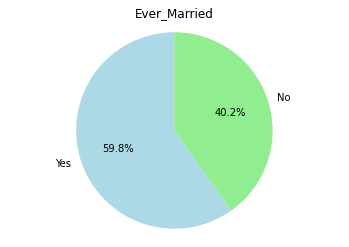

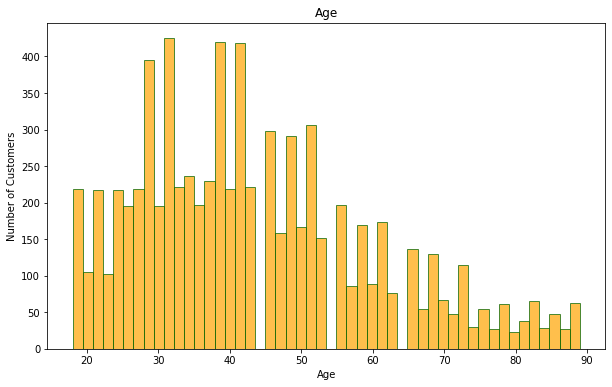

In [28]:
gender_value = df["Gender"].value_counts()

fig, ax = plt.subplots()
ax.pie(
    gender_value,
    labels=gender_value.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightgreen']  # New color palette
)

ax.axis('equal')

plt.title('Gender Distribution')
plt.show()  


graduated_value = df["Graduated"].value_counts()

fig, ax = plt.subplots()
ax.pie(
    graduated_value,
    labels=graduated_value.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightgreen']  # New color palette
)

ax.axis('equal')

plt.title('Graduated Distribution')
plt.show()  


married_value = df["Ever_Married"].value_counts()

fig, ax = plt.subplots()
ax.pie(
    married_value,
    labels=married_value.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightgreen']  # New color palette
)

ax.axis('equal')

plt.title('Ever_Married')
plt.show() 

plt.figure(figsize=(10, 6))
plt.hist(df["Age"], bins=50, color='orange', edgecolor='darkgreen', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Age")
plt.show()

In [29]:
# label encoding 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
        
df.info()
df.head()        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7634 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           7634 non-null   int64
 1   Ever_Married     7634 non-null   int64
 2   Age              7634 non-null   int64
 3   Graduated        7634 non-null   int64
 4   Profession       7634 non-null   int64
 5   Work_Experience  7634 non-null   int64
 6   Spending_Score   7634 non-null   int64
 7   Family_Size      7634 non-null   int64
 8   Var_1            7634 non-null   int64
 9   Segmentation     7634 non-null   int64
dtypes: int64(10)
memory usage: 656.0 KB


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1,2,4,4,3
1,0,1,38,1,2,2,0,3,4,0
2,0,1,67,1,2,1,2,1,6,1
3,1,1,67,1,7,0,1,2,6,1
4,0,1,40,1,3,2,1,6,6,0


In [30]:
# correlation of feartures with Segmentation 

corr_matrix = df.corr()
corr_matrix["Segmentation"].sort_values(ascending=False)

Segmentation       1.000000
Profession         0.194591
Family_Size        0.173489
Spending_Score     0.097116
Work_Experience    0.023865
Gender             0.020336
Var_1             -0.024559
Graduated         -0.162751
Ever_Married      -0.200671
Age               -0.223777
Name: Segmentation, dtype: float64

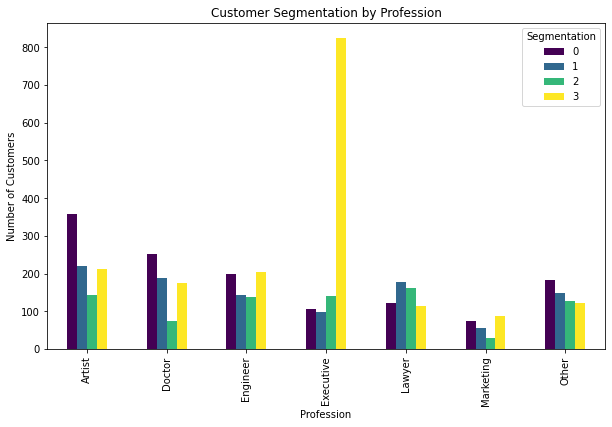

In [31]:
df_plot=df.copy()


profession_labels = {
    1: "Engineer", 2: "Doctor", 3: "Artist", 
    4: "Lawyer", 5: "Executive", 6: "Marketing", 7: "Other"
}
df_plot['Profession'] = df_plot['Profession'].map(profession_labels)



pd.crosstab(df_plot['Profession'], df_plot['Segmentation']).plot(
    kind='bar',
    figsize=(10,6),
    colormap='viridis'
)

plt.title("Customer Segmentation by Profession")
plt.xlabel("Profession")
plt.ylabel("Number of Customers")
plt.legend(title="Segmentation")
plt.show()



In [32]:
scaler = StandardScaler() # implement after spliting
scaler.fit(df)
data_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(data_scaled, columns=df.columns)
df_scaled.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0.915769,-1.220610,-1.307135,-1.298513,0.895382,-0.505513,0.753306,0.776060,-0.775353,1.286251
1,-1.091979,0.819262,-0.338926,0.770112,-0.287681,-0.199794,-1.607909,0.120629,-0.775353,-1.345783
2,-1.091979,0.819262,1.415954,0.770112,-0.287681,-0.505513,0.753306,-1.190234,0.616872,-0.468438
3,0.915769,0.819262,1.415954,0.770112,1.684090,-0.811232,-0.427301,-0.534803,0.616872,-0.468438
4,-1.091979,0.819262,-0.217899,0.770112,0.106673,-0.199794,-0.427301,2.086923,0.616872,-1.345783


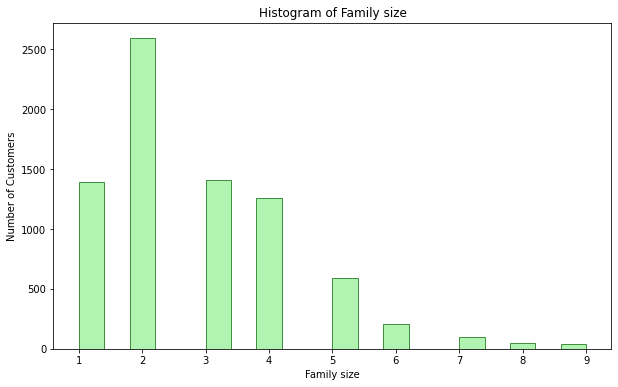

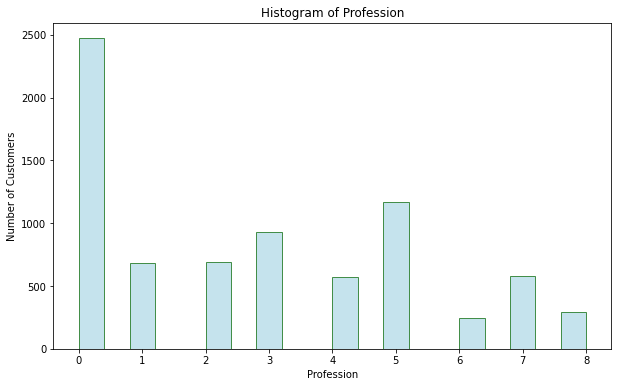

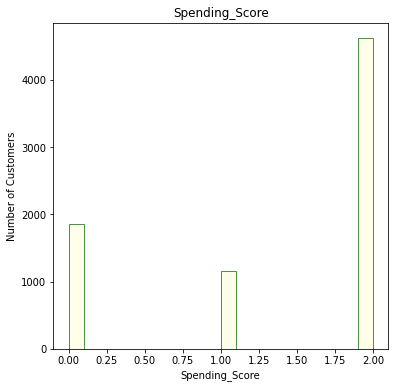

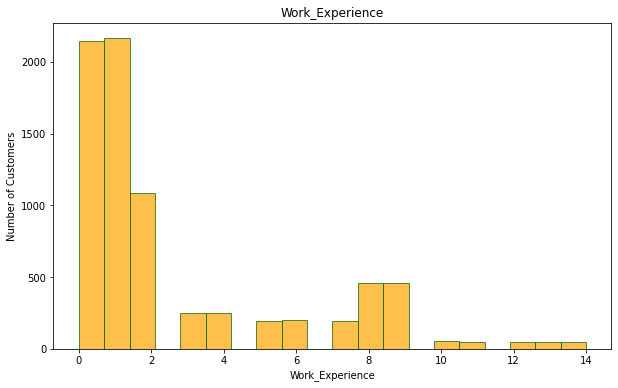

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df["Family_Size"], bins=20, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
plt.xlabel("Family size")
plt.ylabel("Number of Customers")
plt.title("Histogram of Family size")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df["Profession"], bins=20, color='lightblue', edgecolor='darkgreen', alpha=0.7)
plt.xlabel("Profession")
plt.ylabel("Number of Customers")
plt.title("Histogram of Profession")
plt.show()

plt.figure(figsize=(6, 6))
plt.hist(df["Spending_Score"], bins=20, color='lightyellow', edgecolor='darkgreen', alpha=0.7)
plt.xlabel("Spending_Score")
plt.ylabel("Number of Customers")
plt.title("Spending_Score")
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df["Work_Experience"], bins=20, color='orange', edgecolor='darkgreen', alpha=0.7)
plt.xlabel("Work_Experience")
plt.ylabel("Number of Customers")
plt.title("Work_Experience")
plt.show()

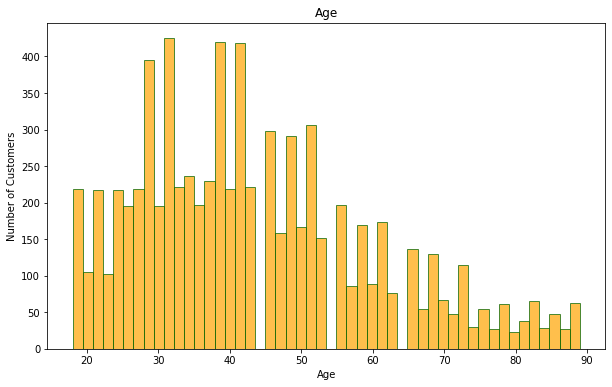

In [33]:


plt.figure(figsize=(10, 6))
plt.hist(df["Age"], bins=50, color='orange', edgecolor='darkgreen', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Age")
plt.show()

In [52]:
# Observations - 

# Spliting the data set 

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


#X = df.drop(['Segmentation'],axis = 1)
y = df['Segmentation']
X = df

In [54]:




#X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size = 0.2 ,random_state = 42)

X_train , X_test , y_train , y_test = train_test_split(df[X] ,df[y] ,test_size = 0.2 ,random_state = 42)



ValueError: Boolean array expected for the condition, not int64

In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(df[features], df[target_rul], test_size=0.2, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression

# Softmax regression model
softmax_reg = LogisticRegression(
    multi_class='multinomial',   # enables softmax instead of one-vs-rest
    solver='lbfgs',              # recommended solver for softmax
    max_iter=100,               # increase if convergence warning appears
    C = 10,
    random_state=42
)


print(X_train)
print(y_train)

# Fit the model
softmax_reg.fit(X_train, y_train)


# Predict class labels
y_pred = softmax_reg.predict(X_test)

# Predict class probabilities (softmax output)
y_prob = softmax_reg.predict_proba(X_test)

softmax_reg.predict([[0,1,38,1,2,2,0,3,4]])
softmax_reg.predict_proba([[0,1,38,1,2,2,0,3,4]])

          ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
2821  460591  Female          Yes   38       Yes      Doctor              1.0   
6192  460459  Female           No   33        No    Engineer              0.0   
1393  459043  Female          Yes   49        No    Engineer              1.0   
812   461220  Female           No   26        No   Executive              8.0   
2215  460403  Female           No   56       Yes      Doctor              3.0   
...      ...     ...          ...  ...       ...         ...              ...   
5226  460386    Male          Yes   29       Yes  Healthcare              0.0   
5390  461514    Male           No   31        No  Healthcare              1.0   
860   467236  Female           No   40       Yes      Lawyer              4.0   
7603  460278    Male          Yes   29       Yes      Artist              0.0   
7270  460267  Female           No   27       Yes  Healthcare              1.0   

     Spending_Score  Family

ValueError: could not convert string to float: 'Female'

In [39]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(softmax_reg, X, y, cv=10, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross-validation scores: [0.4960733  0.5091623  0.4895288  0.46335079 0.47313237 0.45609436
 0.46264744 0.47837484 0.46788991 0.46920052]
Mean accuracy: 0.47654546327873576
